<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Clase 1</h3>
    <h5>Ejercicio 3</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno  y Braian Drago<p>
</div>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose


import warnings
warnings.filterwarnings('ignore')


**Turismo receptivo y emisivo**

Fuente = https://datos.gob.ar/dataset/sspm-encuesta-turismo-internacional/archivo/sspm_322.3

In [ ]:
url2='https://raw.githubusercontent.com/sebcalcagno/AnalisisSeriesTemporales/main/turismo-receptivo-emisivo-aeropuerto-internacional-ezeiza-aeroparque%20(1).csv'
raw_csv_data2 = pd.read_csv(url2)
df2=raw_csv_data2.copy()

In [ ]:
df2.head()

,indice_tiempo,turismo_receptivo,turismo_emisivo,saldo
0,1/1/2010,254.157,162.680,91.477
1,2/1/2010,186.441,186.227,0.214
2,3/1/2010,203.821,167.262,36.559
3,4/1/2010,207.516,141.750,65.766
4,5/1/2010,191.665,154.430,37.235


<Axes: xlabel='indice_tiempo'>

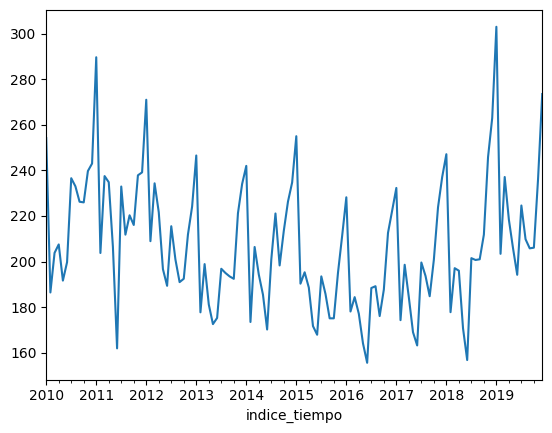

In [ ]:
df2.set_index('indice_tiempo',inplace=True)
df2.index=pd.to_datetime(df2.index)

#drop null values
df2.dropna(inplace=True)

df2.turismo_receptivo.plot()

*COMENTARIO NUEVO 1*

En este caso, la novedad de la grafica ( con respecto al ejercicio 1 y 2) es la presencia de Estacionalidad.
¿ se llega a ver ? En los graficos siguientes, se ve con mayor detalle.

In [ ]:
result2=seasonal_decompose(df2['turismo_receptivo'], model='multiplicable')

In [ ]:
len(df2)

120

<Axes: xlabel='indice_tiempo'>

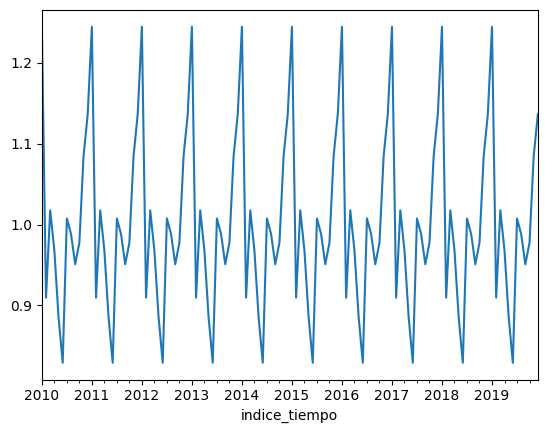

In [ ]:
result2.seasonal.plot()

*COMENTARIO NUEVO 2*

Aqui, usamos la funcion de python para graficar unicamnente la estacionalidad de la serie. A diferencia del ejercicio 1.1 ( que la grafica estaba completamente coloreada ) aqui se ven los picos de presencia de estacionalidad.

<Axes: xlabel='indice_tiempo'>

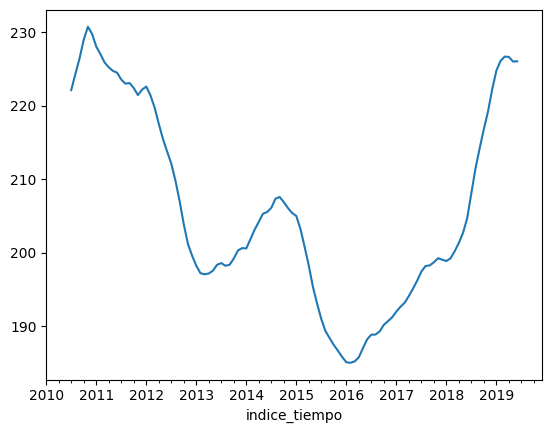

In [ ]:
result2.trend.plot()

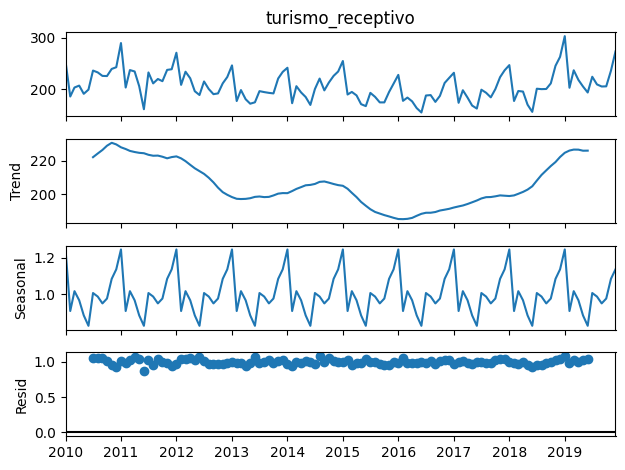

In [ ]:
result2.plot();

*COMENTARIO NUEVO 3*

Una vez mas, la aclaracion es con respecto a la estacionalidad. Recomendamos ir al ejercicio 1.1 y comparar las diferencias.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

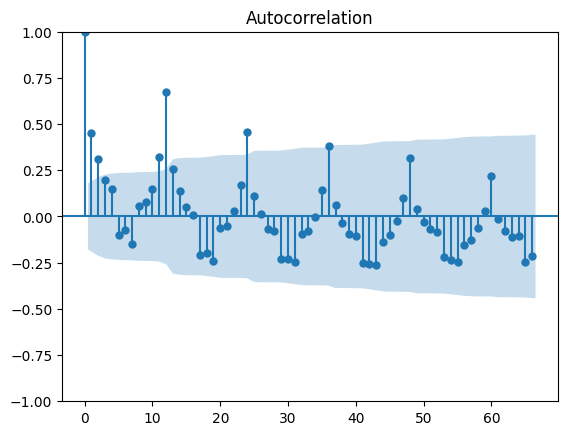

In [ ]:
plot_acf(df2.turismo_receptivo, lags=66);

*COMENTARIO NUEVO 4*

La grafica es la funcion de autocorrelacion, donde tambien pueden verse la presencia de picos estacionales. En este caso, se dan aproximadamente cada 12 periodos. En otras graficas, que veremos mas adelante o ud puede ver con sus ejemplos, los picos pueden llegar a ser mas representativos.

Solo se pueden calcular correlaciones parciales lags de hasta el 50 % del tamaño de la muestra. Los nlags solicitados deben ser menores a 60.


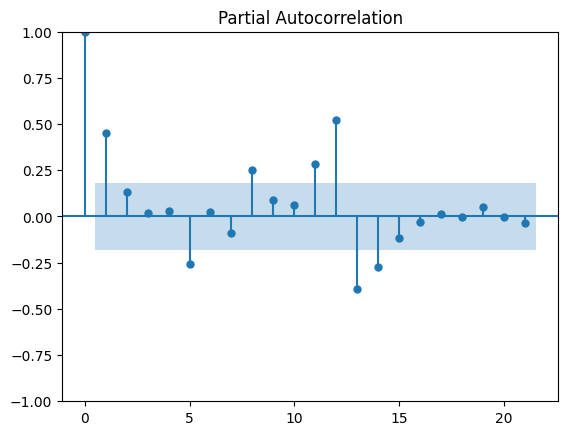

In [ ]:
plot_pacf(df2.turismo_receptivo);